In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 20})  
mpl.rcParams['font.family'] = 'Times New Roman'
save_path_ablation = '../figures/ablation' # Saving path
os.makedirs(save_path_ablation, exist_ok=True)

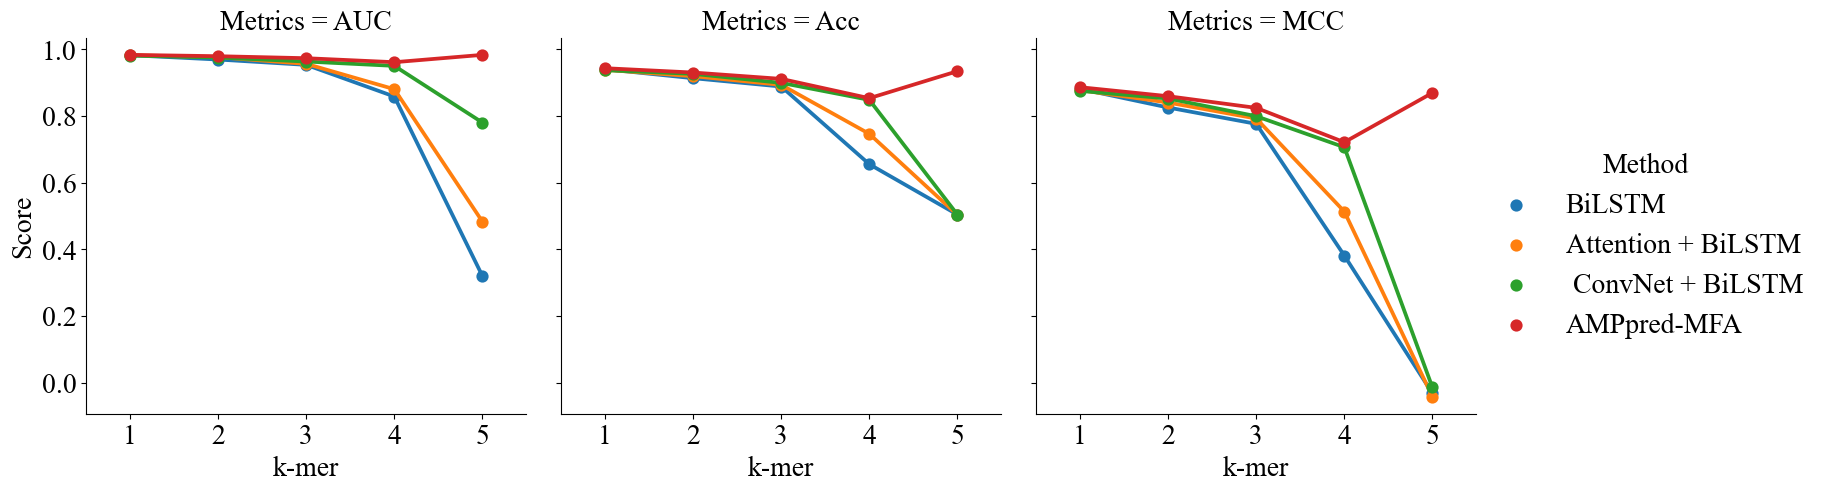

In [2]:
def plot_ablation_kmer(root_dir):
    df_data = pd.DataFrame()
    for dir_name in os.listdir(root_dir):
        result_dir = os.path.join(root_dir,dir_name)
        if os.path.isdir(result_dir) and 'k=' in dir_name:
            result_path = os.path.join(result_dir, 'ablation-kmer.xlsx')
            df_tmp = pd.read_excel(result_path)
            df_tmp.insert(0,'k-mer',dir_name.split('=')[-1])
            df_data = pd.concat([df_data, df_tmp])
    # Does not take standard deviation into account
    for col in df_data.columns[-5:]:
        df_data[col] = df_data[col].str.split(' ± ').str[0].astype(float)
    df_data = df_data[df_data.columns[:-2]]
    df_melt = pd.melt(df_data, id_vars=['k-mer', 'Method'], var_name='Metrics', value_name='Score')
    # Use Seaborn to plot the gap between different metrics for different methods under different k-mers
    fig = sns.catplot(x='k-mer', y='Score', hue='Method', col='Metrics', data=df_melt, kind='point')
    return fig

fig_ablation_kmer = plot_ablation_kmer('./result/ablation for BiLSTM')
fig_ablation_kmer.savefig(
    os.path.join(save_path_ablation, 'ablation of k-mer.png'),
    dpi=600, 
    bbox_inches='tight'
)
